In this kernel, I build a Decision Tree Classifier to predict the safety of the car. I will build two models, one with criterion gini index and another one with criterion entropy. I implement Decision Tree Classification with Python and Scikit-Learn.


# Importing Libraries & Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
df = pd.read_csv('car_evaluation.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(1727, 7)

In [4]:
#Preview dataset

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
#Rename column names

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
#Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#frequency of distribution of values in variables

for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Summary of Variables

* There are 7 variables in the dataset. All the variables are of categorical data type.
* These are given by buying, maint, doors, persons, lug_boot, safety and class.
* class is the target variable.


In [9]:
#exploring target variable

df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

Can see that the class target variable is ordinal in nature

In [10]:
#Checking for Missing Values:

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset.

# Declare Feature Vector and Target Variable

In [11]:
X = df.drop(['class'], axis=1)

y = df['class']

In [12]:
# Split data into separate training and test set ¶


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

In [14]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

# Feature Engineering 

In [15]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Encode categorical variables

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
579,high,high,3,4,med,med
1261,med,low,4,more,small,high
1726,low,low,5more,more,big,high
548,high,high,2,4,small,low
1507,low,high,5more,more,med,high


In [17]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,low,vhigh,2,more,med,high
124,vhigh,high,2,4,big,high
648,high,med,2,2,small,med
249,vhigh,med,3,2,big,med
1598,low,med,5more,2,big,low


In [18]:
#Installing category_encoders to import OrdinalEncoder
# pip install category_encoders

In [19]:
# from sklearn.preprocessing import OneHotEncoder
#Since THEY ARE ORDINAL VARIABLES
from category_encoders import OrdinalEncoder
# Define the columns to be encoded
ordinal_columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Create an ordinal encoder object
encoder = OrdinalEncoder(cols=ordinal_columns)

# Fit the encoder on the training data and transform the training data
X_train = encoder.fit_transform(X_train)

# Transform the test data
X_test = encoder.transform(X_test)

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
579,1,1,1,1,1,1
1261,2,2,2,2,2,2
1726,3,2,3,2,3,2
548,1,1,4,1,2,3
1507,3,1,3,2,1,2


In [21]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1318,3,3,4,2,1,2
124,4,1,4,1,3,2
648,1,4,4,3,2,1
249,4,4,1,3,3,1
1598,3,4,3,3,3,3


# MODEL BUILDING

## 1. Decision Tree Classifier with criterion gini index

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
#Predict the Test set results with criterion gini index

y_pred_gini = clf_gini.predict(X_test)

In [25]:
y_pred_gini

array(['acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'unac

In [26]:
#Check accuracy score with criterion gini index

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion gini index: 0.8158


In [27]:
#Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Compare the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [28]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'acc', 'acc'], dtype=object)

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8003


Checking for overfitting and underfitting

In [30]:
#Printing Scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8003
Test set score: 0.8158


Here, the training-set accuracy score is 0.8003 while the test-set accuracy to be 0.8158. These two values are quite comparable. So, there is no sign of overfitting.


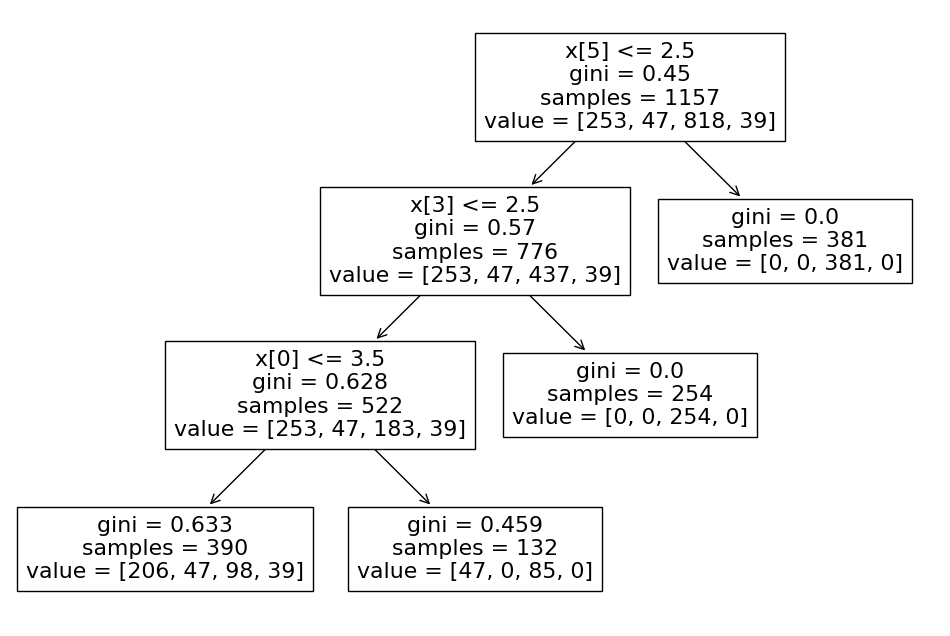

In [31]:
# Visualize decision-trees

plt.figure(figsize = (12,8))  

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train));

## 2. Decision Tree Classifier with criterion entropy

In [32]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#Fit the model

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [33]:
#Predicting test set result with criterion entropy

y_pred_en = clf_en.predict(X_test)
# y_pred_en

In [34]:
#Checking accuracy score with criterion entropy

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model accuracy score with criterion entropy: 0.8158


In [35]:
#Comparing train and test set accuracy

y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'acc', 'acc', ..., 'unacc', 'acc', 'acc'], dtype=object)

In [36]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))


Training-set accuracy score: 0.8003


In [37]:
#Check for overfitting and underfitting

# print the scores on training and test set 
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8003
Test set score: 0.8158


These two values are quite comparable. So, there is no sign of overfitting.


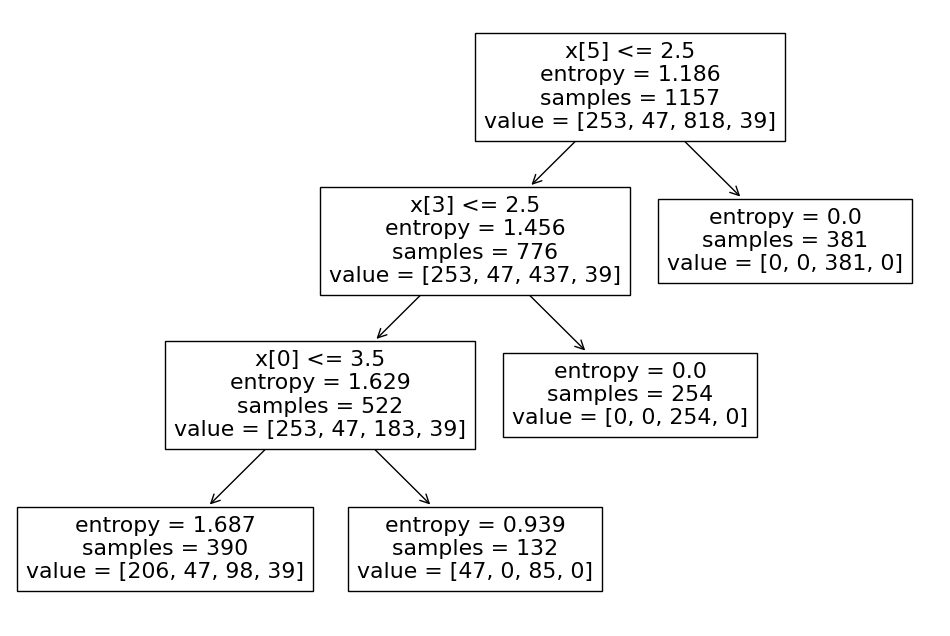

In [38]:
# Visualize Decision Tree

plt.figure(figsize = (12,8))

tree.plot_tree(clf_en.fit(X_train, y_train));

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.



# Model Evaluation

## 1. Confusion Matrix

In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106   0  25   0]
 [ 22   0   0   0]
 [ 32   0 359   0]
 [ 26   0   0   0]]


## 2. Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.



In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.57      0.81      0.67       131
        good       0.00      0.00      0.00        22
       unacc       0.93      0.92      0.93       391
       vgood       0.00      0.00      0.00        26

    accuracy                           0.82       570
   macro avg       0.38      0.43      0.40       570
weighted avg       0.77      0.82      0.79       570



C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Results and conclusion

1. In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8158.
2. In the model with criterion gini index, the training-set accuracy score is 0.8003. while the test-set accuracy to be 0.8151. These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion entropy, the training-set and test-set score is same as in the case with criterion gini. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5. The confusion matrix and classification report yields very good model performance.
